In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob

from scripts.my_camera_cal import readValuesToUndistort
from scripts.my_camera_cal import unwarp

from scripts.my_pipeline import pipeline
from scripts.my_camera_cal import image_perspective

from scripts.my_line_finding import fit_polynomial
from scripts.my_line_finding import search_around_poly

In [2]:
mtx,dist=readValuesToUndistort("config/myvalues_to_undistort.p")

In [3]:
# Make a list of calibration images
images = glob.glob('../test_images/*.jpg')
print(images)

['../test_images\\harder1.jpg', '../test_images\\straight_lines1.jpg', '../test_images\\straight_lines2.jpg', '../test_images\\test1.jpg', '../test_images\\test2.jpg', '../test_images\\test3.jpg', '../test_images\\test4.jpg', '../test_images\\test5.jpg', '../test_images\\test6.jpg']


(720, 1280, 3)
(720, 1280, 3)


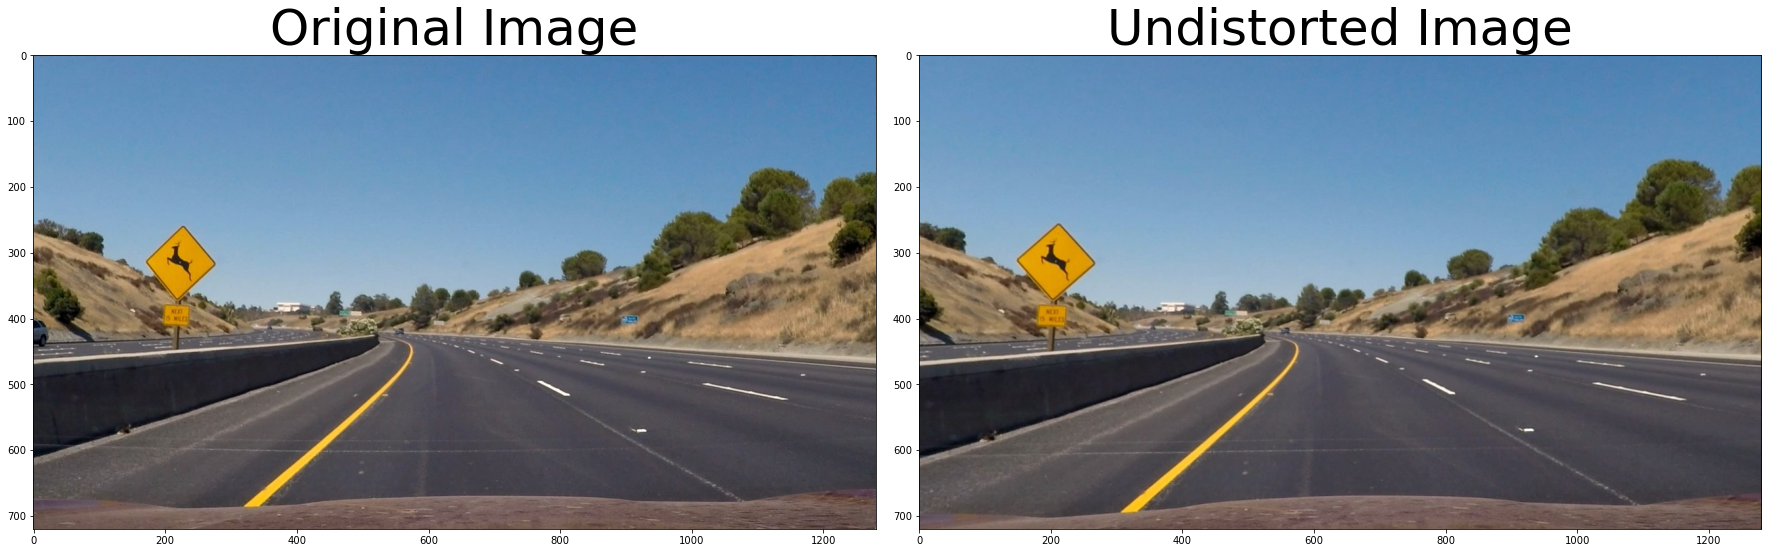

In [4]:
# Read in an image
image = mpimg.imread('../test_images/test2.jpg')
print(image.shape)

#undistort it
dst = cv2.undistort(image, mtx, dist, None, mtx)
print(dst.shape)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

(720, 1280)


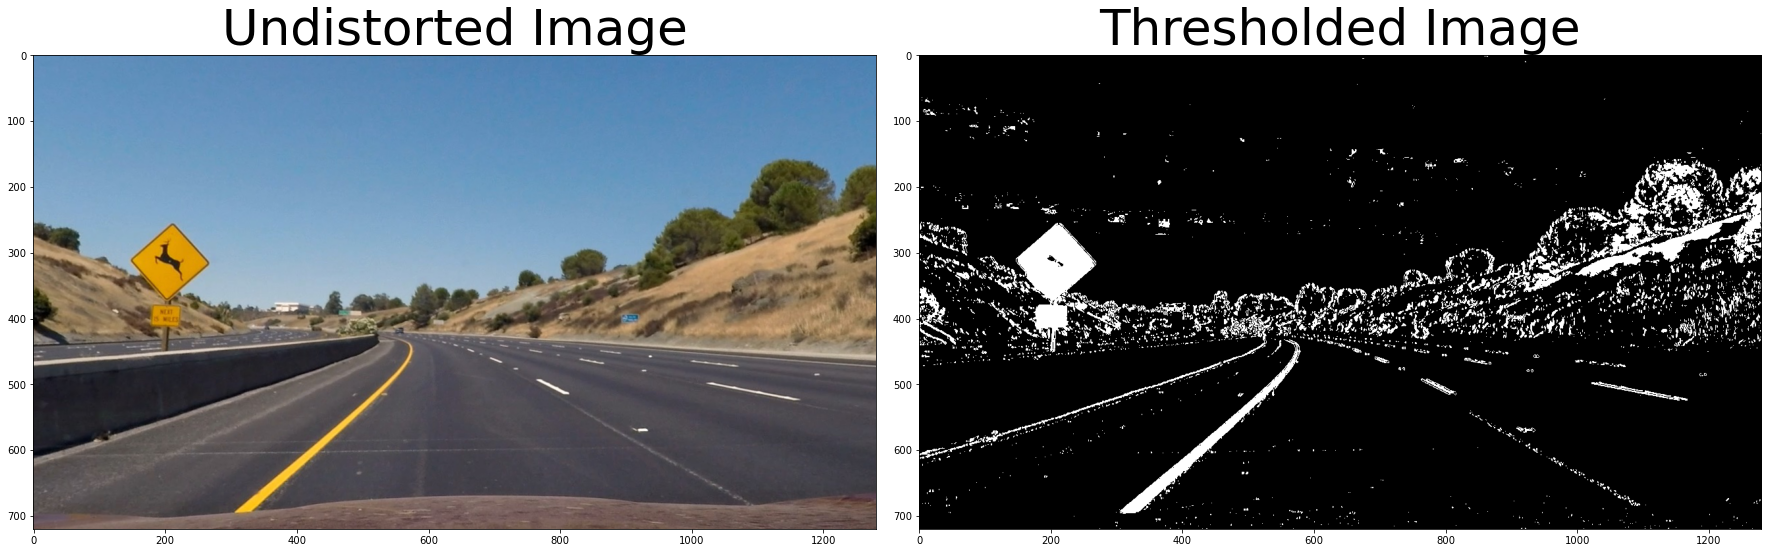

In [5]:
color_binary,combined_binary= pipeline(dst,channel='s',color_thresh=(110,255), orient='x', sobel_thresh=(20, 100))
print(combined_binary.shape)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(dst)
ax1.set_title('Undistorted Image', fontsize=50)
ax2.imshow(combined_binary,cmap="gray")
ax2.set_title('Thresholded Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

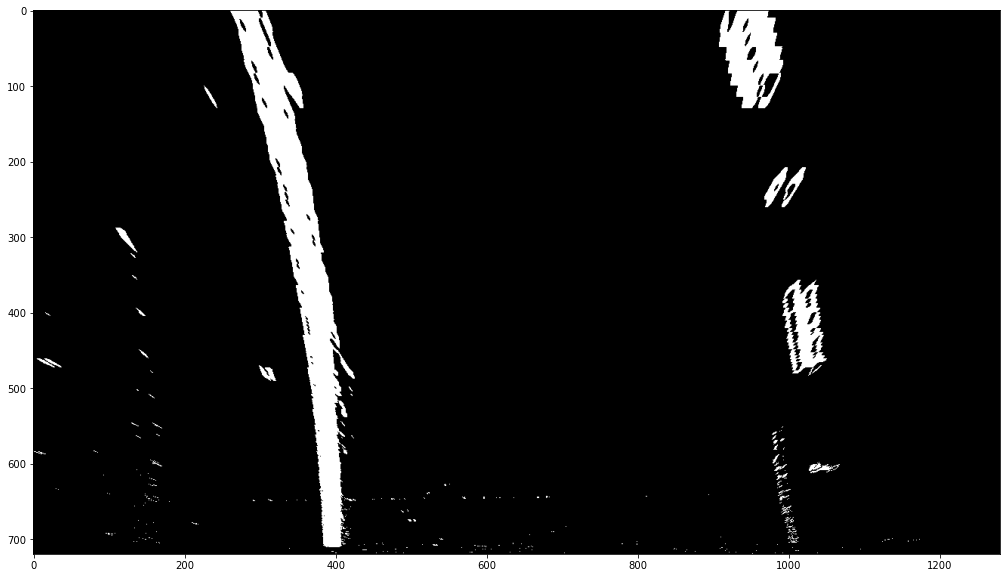

In [6]:
bird_image,M=image_perspective(combined_binary)
plt.figure(figsize=(20,10))
plt.imshow(bird_image,cmap="gray")

### Now finding lanes

[-2.06014798e-04  3.00151806e-01  2.86603428e+02] [-3.20495194e-04  3.32097571e-01  9.33805210e+02]


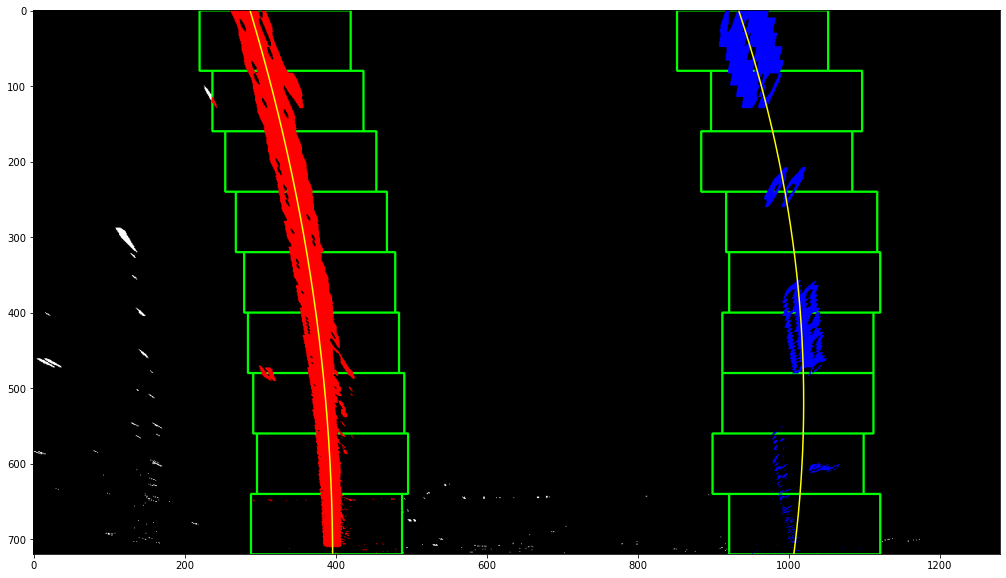

In [7]:
#You have to call the function and imshow together to see the polynomial inside the plot
plt.figure(figsize=(20,10))
l_fit,r_fit,polynomial_image=fit_polynomial(bird_image)
print(l_fit,r_fit)
plt.imshow(polynomial_image)

In [10]:
plt.imsave('../output_images/tracking_lanes_scratch2.jpg', polynomial_image)

[-2.06014798e-04  3.00151806e-01  2.86603428e+02] [-3.20495194e-04  3.32097571e-01  9.33805210e+02]


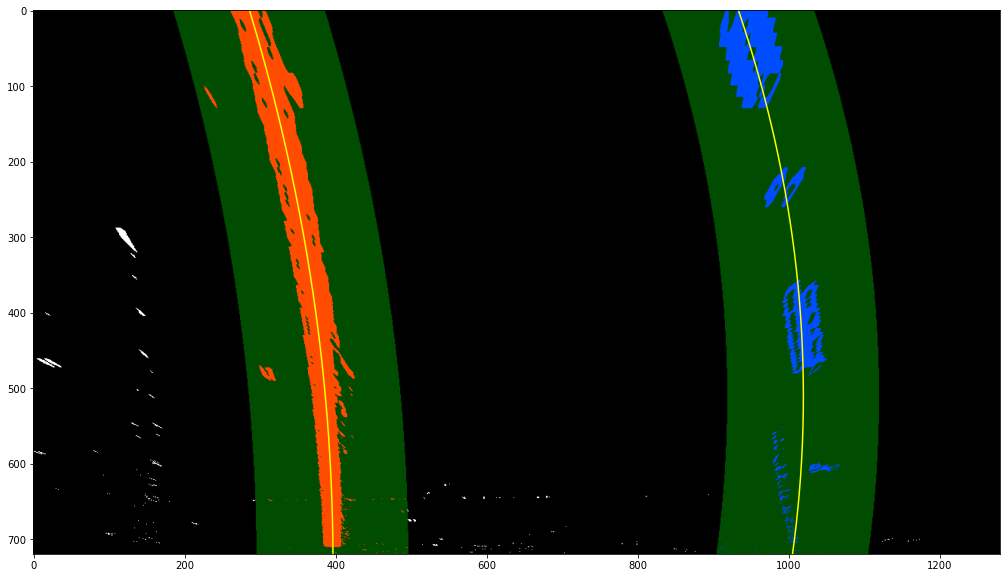

In [9]:
#You have to call the function and imshow together to see the polynomial inside the plot
plt.figure(figsize=(20,10))
l_fit2,r_fit2,polynomial_image2=search_around_poly(bird_image,l_fit,r_fit)
print(l_fit2,r_fit2)
plt.imshow(polynomial_image2)

In [11]:
plt.imsave('../output_images/tracking_lanes_prior2.jpg', polynomial_image2)